#### Find the spectrum of the TlF groundstate

Python translation by Jakob Kastelic.
Original by Oskari Timgren (or was it Dave DeMille?).

In [1]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from __future__ import division
# %matplotlib notebook

In [2]:
# Units and constants

Jmax = 6      # max J value in Hamiltonian
I_Tl = 1/2    # I1 in Ramsey's notation
I_F = 1/2     # I2 in Ramsey's notation

# TlF constants. Data from D.A. Wilkening, N.F. Ramsey,
# and D.J. Larson, Phys Rev A 29, 425 (1984). Everything in Hz.

Brot = 6689920000
c1 = 126030.0
c2 = 17890.0
c3 = 700.0
c4 = -13300.0

D_TlF = 4.2282 * 0.393430307 *5.291772e-9/4.135667e-15 # [Hz/(V/cm)]

# Constants from Wilkening et al, in Hz/Gauss, for 205Tl

mu_J = 35;
mu_Tl = 1240.5;
mu_F = 2003.63;

In [3]:
# Total number of states in Hilbert space

N_states = int((2*I_Tl+1)*(2*I_F+1)*(Jmax+1)*(Jmax+1));

# Fill an array of quantum numbers for each basis state

QN = []
for J in range(Jmax+1):
    for m_J in range(-J,J+1):
        for m_I_Tl in np.arange(-I_Tl,I_Tl+1):
            for m_I_F in np.arange(-I_F,I_F+1):
                QN.append([J,m_J,m_I_Tl,m_I_F])

In [4]:
# Create field-free Hamiltonian matrix:
#   H = Brot(J.J) + c1(I1.J) + c2(I2.J) + c4(I1.I2) +
#       5c3[3(I1.J)(I2.J)+3(I2.J)(I1.J)-2(I1.I2)J.J]/[(2J+3)(2J+1)]

Ham_ff = np.zeros([N_states,N_states]);

# In the following loop, note that
#    i = row number of H matrix, corresponds to BRA <J_i,m_J_i,m_Tl_i,m_F_i|
#    j = column number of H matrix, corresponds to KET |J_j,m_J_j,m_Tl_j,m_F_j>;
#        indexing gives upper right part of matrix

for i in range(N_states):
    J_i    = QN[i][0] # rotational quantum number for state #i
    m_J_i  = QN[i][1] # rotational projection for state #i
    m_Tl_i = QN[i][2] # Tl projection for state #i
    m_F_i  = QN[i][3] # I projection for state #i
    for j in range(i,N_states):
        J_j    = QN[j][0] # rotational quantum number for state #j
        m_J_j  = QN[j][1] # rotational projection for state #j
        m_Tl_j = QN[j][2] # Tl projection for state #j
        m_F_j  = QN[j][3] # I projection for state #j

        # rotational term (diagonal elements)
        if j == i:
            Ham_ff[i,j] = Ham_ff[i,j] + Brot*J_j*(J_j+1)

        # c1 term (I_Tl.J)
        if J_i==J_j and m_F_i==m_F_j: # matching m_F
            if m_J_i==m_J_j and m_Tl_i==m_Tl_j: # the JzIz term (j = ket, i = bra)
                Ham_ff[i,j] = Ham_ff[i,j] + c1*m_J_j*m_Tl_j
            elif (m_J_i==m_J_j+1) and (m_Tl_i==m_Tl_j-1): # the J+I- term
                Ham_ff[i,j] = Ham_ff[i,j] + c1*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j +1))*sqrt(I_Tl*(I_Tl +1)- m_Tl_j*(m_Tl_j -1))/2
            elif m_J_i==m_J_j-1 and m_Tl_i==m_Tl_j+1: # the J-I+ term
                Ham_ff[i,j] = Ham_ff[i,j]+ c1*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j -1))*sqrt(I_Tl*(I_Tl +1)- m_Tl_j*(m_Tl_j +1))/2
        
        # c2 term (I_F.J)
        if J_i==J_j and m_Tl_i==m_Tl_j: # J and m_Tl have to match
            if m_J_i==m_J_j and m_F_i==m_F_j: # the JzIz term
                Ham_ff[i,j] = Ham_ff[i,j]+ c2*m_J_i*m_F_i
            elif m_J_i==m_J_j+1 and m_F_i==m_F_j-1: # the J+I- term
                Ham_ff[i,j] = Ham_ff[i,j]+ c2*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j +1))*sqrt(I_F*(I_F +1)- m_F_j*(m_F_j -1))/2
            elif m_J_i==m_J_j-1 and m_F_i==m_F_j+1: # the J-I+ term
                Ham_ff[i,j] = Ham_ff[i,j]+ c2*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j -1))*sqrt(I_F*(I_F +1)- m_F_j*(m_F_j +1))/2

        # first part of c3 term (2nd part appears later)
        if J_i==J_j: # Js have to match
            cc3a = 15*c3/((2*J_j +3)*(2*J_j +1)) # this is a dummy variable, the effective coefficient for this value of J
            if m_J_i==m_J_j-2: # delta m_J = -2
                if m_Tl_i==m_Tl_j+1 and m_F_i==m_F_j+1: # delta m_F = +1, delta m_Tl = +1
                    factor = sqrt(J_j*(J_j +1)-m_J_j*(m_J_j -1))*sqrt(J_j*(J_j +1)-(m_J_j -1)*(m_J_j -2)) # two J lowering ops
                    factor = factor * sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j +1))*sqrt(I_F*(I_F +1)- m_F_j*(m_F_j +1)) # two I raising ops
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor/2
            elif m_J_i==m_J_j-1: # delta m_J = -1
                factor1 = sqrt(J_j*(J_j +1)-m_J_j*(m_J_j -1))*m_J_j # J-Jz
                factor2 = (m_J_j-1)*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j -1)) # JzJ-
                factor = factor1 + factor2
                if m_Tl_i==m_Tl_j+1 and m_F_i==m_F_j: # I1+ and I2z
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor*sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j +1))*m_F_j/2
                elif m_Tl_i==m_Tl_j and m_F_i==m_F_j+1: # I1z and I2+
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor*m_Tl_j*sqrt(I_F*(I_F +1)-m_F_j*(m_F_j +1))/2
            elif m_J_i==m_J_j: # delta m_J = 0
                if m_Tl_i==m_Tl_j and m_F_i==m_F_j: # I1z and I2z
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*2*m_J_j*m_J_j*m_Tl_j*m_F_j
                elif m_Tl_i==m_Tl_j+1 and m_F_i==m_F_j-1: # I1+ and I2-
                    factor1 = sqrt(J_j*(J_j +1)-(m_J_j +1)*(m_J_j +1 -1))*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j +1)) # J-J+
                    factor2 = sqrt(J_j*(J_j +1)-(m_J_j -1)*(m_J_j -1 +1))*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j -1)) # J+J-
                    factor = factor1 + factor2
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor*sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j +1))*sqrt(I_F*(I_F +1)-m_F_j*(m_F_j -1))/4
                elif m_Tl_i==m_Tl_j-1 and m_F_i==m_F_j+1: # I1- and I2+
                    factor1 = sqrt(J_j*(J_j +1)-(m_J_j +1)*(m_J_j +1 -1))*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j +1)) # J-J+
                    factor2 = sqrt(J_j*(J_j +1)-(m_J_j -1)*(m_J_j -1 +1))*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j -1)) # J+J-
                    factor = factor1 + factor2
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor*sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j -1))*sqrt(I_F*(I_F +1)-m_F_j*(m_F_j +1))/4
            elif m_J_i==m_J_j+1: # delta m_J = +1
                factor1 = sqrt(J_j*(J_j +1)-m_J_j*(m_J_j +1))*m_J_j # J+Jz
                factor2 = (m_J_j-1)*sqrt(J_j*(J_j +1)-m_J_j*(m_J_j +1)) # JzJ+
                factor = factor1 + factor2
                if m_Tl_i==m_Tl_j-1 and m_F_i==m_F_j: # I1- and I2z
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor*sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j -1))*m_F_j/2
                elif m_Tl_i==m_Tl_j and m_F_i==m_F_j-1: #I1z and I2-
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor*m_Tl_j*sqrt(I_F*(I_F +1)-m_F_j*(m_F_j -1))/2
            elif m_J_i==m_J_j+2: # delta m_J = +2
                if m_Tl_i==m_Tl_j-1 and m_F_i==m_F_j-1: # delta m_F = -1, delta m_Tl = -1
                    factor = sqrt(J_j*(J_j +1)-m_J_j*(m_J_j +1))*sqrt(J_j*(J_j +1)-(m_J_j +1)*(m_J_j +2)) # two J raising ops
                    factor = factor * sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j -1))*sqrt(I_F*(I_F +1)- m_F_j*(m_F_j -1)) # two I lowering ops
                    Ham_ff[i,j] = Ham_ff[i,j]+ cc3a*factor/2

        # c4 term c4(I_Tl.I_F) and 2nd part of c3 term:
        # -10c3(I1.I2)J(J+1)/[(2J+3)(2J+1)]
        c4=0
        if J_i==J_j and m_J_i==m_J_j: # J and m_J have to match
            cc34 = c4 - 10*c3*J_j*(J_j +1)/((2*J_j + 3)*(2*J_j + 1))  # dummy variable, effective c4 term for this J
            if m_Tl_i==m_Tl_j and m_F_i==m_F_j: # this is I1zI2z term
                Ham_ff[i,j] = Ham_ff[i,j]+ cc34*m_Tl_j*m_F_j
            elif m_Tl_i==m_Tl_j+1 and m_F_i==m_F_j-1:  # this is I1+I2- term
                Ham_ff[i,j] = Ham_ff[i,j]+ cc34*sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j +1))*sqrt(I_F*(I_F +1)- m_F_j*(m_F_j -1))/2
            elif m_Tl_i==m_Tl_j-1 and m_F_i==m_F_j+1: # this is I1-I2+ term
                Ham_ff[i,j] = Ham_ff[i,j]+ cc34*sqrt(I_Tl*(I_Tl +1)-m_Tl_j*(m_Tl_j -1))*sqrt(I_F*(I_F +1)- m_F_j*(m_F_j +1))/2

        # Symmetrize Hamiltonian matrix
        Ham_ff[j,i] = Ham_ff[i,j]

In [5]:
# Zeeman Hamiltonian
#   H_Z = -\mu_J(J.B)/J - \mu_1(I1.B)/I1 - \mu_2(I2.B)/I2

Ham_Z_z = np.zeros([N_states,N_states])

for i in range(N_states):
    J_i    = QN[i][0] # rotational quantum number for state #i
    m_J_i  = QN[i][1] # rotational projection for state #i
    m_Tl_i = QN[i][2] # Tl projection for state #i
    m_F_i  = QN[i][3] # I projection for state #i
    for j in range(N_states):
        J_j    = QN[j][0] # rotational quantum number for state #j
        m_J_j  = QN[j][1] # rotational projection for state #j
        m_Tl_j = QN[j][2] # Tl projection for state #j
        m_F_j  = QN[j][3] # I projection for state #j
        
        if J_i==J_j:
            if m_J_i==m_J_j and m_Tl_i==m_Tl_j and m_F_i==m_F_j: # all quantum numbers m_F, m_Tl, m_J are the same, as needed for Bz term
                Ham_Z_z[i,j] = Ham_Z_z[i,j] - mu_Tl*m_Tl_j/I_Tl - mu_F*m_F_j/I_F # both nuclear spin Zeeman terms
                if J_i != 0: # rotational Zeeman, accounting for J=0 anomalous behavior
                    Ham_Z_z[i,j] = Ham_Z_z[i,j] - mu_J*m_J_j/J_j # rotational Zeeman, accounting for J=0 anomalous behavior
                
        # Symmetrize Hamiltonian matrix
        Ham_Z_z[j,i] = Ham_Z_z[i,j];

In [6]:
# Stark Hamiltonian

Ham_St_z = np.zeros([N_states,N_states])

for i in range(N_states):
    J_i    = QN[i][0] # rotational quantum number for state #i
    m_J_i  = QN[i][1] # rotational projection for state #i
    m_Tl_i = QN[i][2] # Tl projection for state #i
    m_F_i  = QN[i][3] # I projection for state #i
    for j in range(N_states):
        J_j    = QN[j][0] # rotational quantum number for state #j
        m_J_j  = QN[j][1] # rotational projection for state #j
        m_Tl_j = QN[j][2] # Tl projection for state #j
        m_F_j  = QN[j][3] # I projection for state #j

        if (m_F_i==m_F_j) and (m_Tl_i==m_Tl_j) and (m_J_i==m_J_j): # for terms diagonal in m_F, m_Tl, and m_J
            if J_i==(J_j-1):
                Ham_St_z[i,j] = Ham_St_z[i,j] - D_TlF * sqrt((J_j**2-m_J_j**2)/(4*J_j**2 -1.0))/2
            elif J_i==(J_j+1):
                Ham_St_z[i,j] = Ham_St_z[i,j] - D_TlF * sqrt(((J_j+1)**2-m_J_j**2)/(4*(J_j+1)**2 -1.0))/2

        # Symmetrize Hamiltonian matrix
        Ham_St_z[j,i] = Ham_St_z[i,j]

#### Stark effect at B=18.4G

In [12]:
# Construct the total Hamiltonian with Ez:
# HamE = Ham_ff + Ez*Ham_St_z

Ez_array = np.linspace(0,600,400) # all the Ez values in the loop
Bz = 18.4                        # Bz in Gauss

Energies_E = []
for Ez in Ez_array:
    HamE = Ham_ff + Bz*Ham_Z_z + Ez*Ham_St_z # make the full Hamiltonian matrix for this Ez
    D = np.sort(np.linalg.eigvalsh(HamE))    # find eigenvalues D of Hamiltonian

    # Subtract away rotational energy for easier viewing of substructure
    hfs_mat = []
    for i in range(N_states):
        J_i = QN[i][0]
        hfs_mat.append(D[i] - J_i*(J_i +1)*Brot)

    hfs_kHz = np.array(hfs_mat)/1000;   # change units to kHz for easier viewing
    Energies_E.append(hfs_kHz)            # fill in array of energies of J=1 states only

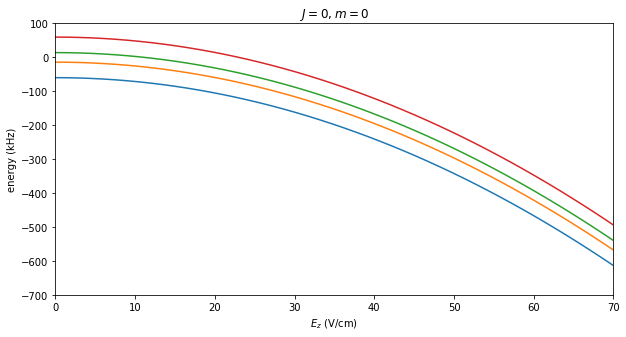

In [13]:
# Plot the energies of the J=0 states vs. Ez

for i in range(0,4):
    plt.plot(Ez_array, np.transpose(Energies_E)[i], label=str(i+1))

plt.title("$J=0, m=0$")
plt.xlabel("$E_z$ (V/cm)")
plt.ylabel("energy (kHz)")

plt.xlim([0,70])
plt.ylim([-700,100])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

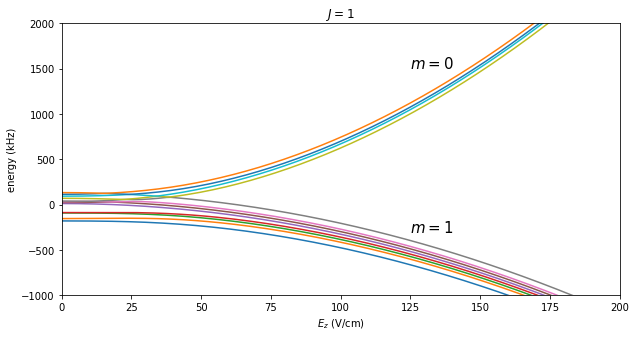

In [14]:
# Plot the energies of the J=1 states vs. Ez

for i in range(4,16):
    plt.plot(Ez_array, np.transpose(Energies_E)[i], label=str(i-3))

plt.title("$J=1$")
plt.xlabel("$E_z$ (V/cm)")
plt.ylabel("energy (kHz)")
plt.text(125,1500,"$m=0$", fontsize=15)
plt.text(125,-300,"$m=1$", fontsize=15)

plt.xlim([0,200])
plt.ylim([-1000,2000])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

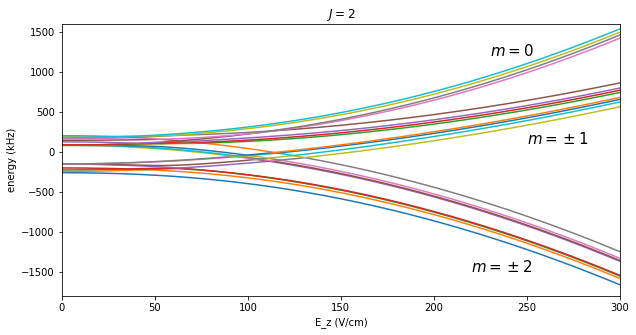

In [15]:
# Plot the energies of the J=2 states vs. Ez
for i in range(16,36):
    plt.plot(Ez_array, np.transpose(Energies_E)[i], label=str(i-15))

plt.title("$J=2$")
plt.xlabel("E_z (V/cm)")
plt.ylabel("energy (kHz)")
plt.text(230,1200,"$m=0$", fontsize=15)
plt.text(250,100,"$m=\pm1$", fontsize=15)
plt.text(220,-1500,"$m=\pm2$", fontsize=15)

plt.xlim([0,300])
plt.ylim([-1800,1600])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

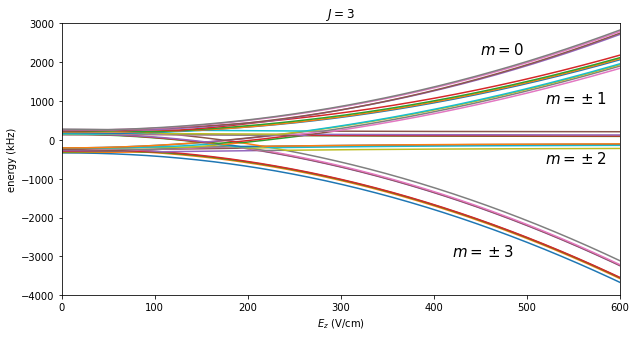

In [18]:
# Plot the energies of the J=3 states vs. Ez
for i in range(36,64):
    plt.plot(Ez_array, np.transpose(Energies_E)[i], label=str(i-15))

plt.title("$J=3$")
plt.xlabel("$E_z$ (V/cm)")
plt.ylabel("energy (kHz)")
plt.text(450,2200,"$m=0$", fontsize=15)
plt.text(520,950,"$m=\pm1$", fontsize=15)
plt.text(520,-600,"$m=\pm2$", fontsize=15)
plt.text(420,-3000,"$m=\pm3$", fontsize=15)

plt.xlim([0,600])
plt.ylim([-4000,3000])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()